In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/EEG_Signal_Based_UpperLimb_Motion_Recognition&Control/Features_Extracted.csv')
df.head()

,mean,median,variance,std_deviation,kurtosis,skewness,peak2peak,rms,spectral_entropy,approx_entropy,zero_crossings,label
0,0.031170,-1.061383,850.189895,29.158016,3.747455,0.101851,257.964917,29.155174,0.513727,0.613496,332,Liftoff
1,-0.031463,0.386098,1097.625596,33.130433,7.069992,-0.141784,400.589642,33.127200,0.512483,0.571197,312,Liftoff
2,0.004578,0.378277,454.930412,21.329098,5.836629,0.124112,251.060393,21.327007,0.496757,0.587259,332,Liftoff
3,0.040959,-0.375902,1812.435663,42.572710,3.294124,-0.025043,315.604006,42.568556,0.497035,0.607526,309,Liftoff
4,-0.058856,0.258249,3274.781706,57.225708,8.673150,0.376142,793.934905,57.220128,0.482205,0.565901,281,Liftoff


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mean              36 non-null     float64
 1   median            36 non-null     float64
 2   variance          36 non-null     float64
 3   std_deviation     36 non-null     float64
 4   kurtosis          36 non-null     float64
 5   skewness          36 non-null     float64
 6   peak2peak         36 non-null     float64
 7   rms               36 non-null     float64
 8   spectral_entropy  36 non-null     float64
 9   approx_entropy    36 non-null     float64
 10  zero_crossings    36 non-null     int64  
 11  label             36 non-null     object 
dtypes: float64(10), int64(1), object(1)
memory usage: 3.5+ KB


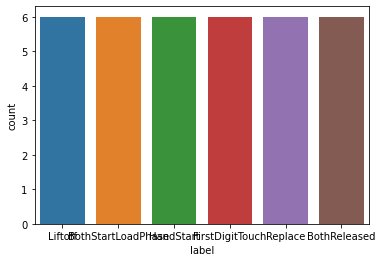

In [ ]:
import seaborn as sns
sns.countplot(x='label', data=df)

In [ ]:
df.isnull().sum()
#no missing values

mean                0
median              0
variance            0
std_deviation       0
kurtosis            0
skewness            0
peak2peak           0
rms                 0
spectral_entropy    0
approx_entropy      0
zero_crossings      0
label               0
dtype: int64

In [ ]:
encode = ({'Liftoff': 0, 'BothStartLoadPhase': 1, 'HandStart': 2,'Replace': 3, 'FirstDigitTouch': 4, 'BothReleased': 5} )
#new dataset with replaced values
df_encoded = df.replace(encode)

print(df_encoded.head())
print(df_encoded['label'].value_counts())

       mean    median     variance  ...  approx_entropy  zero_crossings  label
0  0.031170 -1.061383   850.189895  ...        0.613496             332      0
1 -0.031463  0.386098  1097.625596  ...        0.571197             312      0
2  0.004578  0.378277   454.930412  ...        0.587259             332      0
3  0.040959 -0.375902  1812.435663  ...        0.607526             309      0
4 -0.058856  0.258249  3274.781706  ...        0.565901             281      0

[5 rows x 12 columns]
5    6
4    6
3    6
2    6
1    6
0    6
Name: label, dtype: int64


In [ ]:
df_encoded['label'].unique()


array([0, 1, 2, 4, 3, 5])

In [ ]:
df_encoded.head()

,mean,median,variance,std_deviation,kurtosis,skewness,peak2peak,rms,spectral_entropy,approx_entropy,zero_crossings,label
0,0.031170,-1.061383,850.189895,29.158016,3.747455,0.101851,257.964917,29.155174,0.513727,0.613496,332,0
1,-0.031463,0.386098,1097.625596,33.130433,7.069992,-0.141784,400.589642,33.127200,0.512483,0.571197,312,0
2,0.004578,0.378277,454.930412,21.329098,5.836629,0.124112,251.060393,21.327007,0.496757,0.587259,332,0
3,0.040959,-0.375902,1812.435663,42.572710,3.294124,-0.025043,315.604006,42.568556,0.497035,0.607526,309,0
4,-0.058856,0.258249,3274.781706,57.225708,8.673150,0.376142,793.934905,57.220128,0.482205,0.565901,281,0


In [ ]:
x=df_encoded.drop(["label"]  ,axis=1)
x.shape

(36, 11)

In [ ]:
y = df_encoded.loc[:,'label'].values
y.shape

(36,)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
y

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],1,x.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0],1,x.shape[1]))

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
tf.keras.backend.clear_session()

model = Sequential()
model.add(LSTM(64, input_shape=(1,11),activation="relu",return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32,activation="sigmoid"))
model.add(Dropout(0.2))
#model.add(LSTM(100,return_sequences=True))
#model.add(Dropout(0.2))
#model.add(LSTM(50))
#model.add(Dropout(0.2))
model.add(Dense(6, activation='sigmoid'))
from tensorflow.keras.optimizers import SGD
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             19456     
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 6)                 198       
                                                                 
Total params: 32,070
Trainable params: 32,070
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs = 100, validation_data= (x_test, y_test))
#score, acc = model.evaluate(x_test, y_test)

Epoch 1/100
1/1 [==============================] - 0s 73ms/step - loss: 0.4566 - accuracy: 0.9643 - val_loss: 2.1920 - val_accuracy: 0.1250
Epoch 2/100
1/1 [==============================] - 0s 36ms/step - loss: 0.5318 - accuracy: 0.8571 - val_loss: 2.1935 - val_accuracy: 0.1250
Epoch 3/100
1/1 [==============================] - 0s 35ms/step - loss: 0.4128 - accuracy: 0.8929 - val_loss: 2.1952 - val_accuracy: 0.1250
Epoch 4/100
1/1 [==============================] - 0s 30ms/step - loss: 0.5955 - accuracy: 0.8214 - val_loss: 2.1968 - val_accuracy: 0.1250
Epoch 5/100
1/1 [==============================] - 0s 33ms/step - loss: 0.4356 - accuracy: 0.8571 - val_loss: 2.1983 - val_accuracy: 0.1250
Epoch 6/100
1/1 [==============================] - 0s 29ms/step - loss: 0.4438 - accuracy: 0.9286 - val_loss: 2.2008 - val_accuracy: 0.1250
Epoch 7/100
1/1 [==============================] - 0s 35ms/step - loss: 0.5251 - accuracy: 0.8929 - val_loss: 2.2022 - val_accuracy: 0.1250
Epoch 8/100
1/1 [===